In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from matplotlib import pyplot as plt


change column name

In [4]:
df = pd.read_csv("/home/mihir/internship/google_stock/GOOGL.csv")
close1=df.iloc[:,4]
close1=close1.shift(1)
close1.head()
df=df.join(close1,lsuffix='', rsuffix='')
df=df.dropna()
df.head()
df = df.drop(['adjusted_close','dividend_amount','split_coefficient'], axis=1)
df.dtypes
df['timestamp'] = pd.to_datetime(df.timestamp)
df.dtypes
df = df.sort_values('timestamp')
df.describe()


ValueError: columns overlap but no suffix specified: Index(['close'], dtype='object')

In [4]:
y = df['close_close1']
cols = ['open', 'high', 'close_df', 'volume']
x = df[cols]
y.head()
x.head()
x.iloc[0:10, 3]

3421    44659000
3420    22834300
3419    18256100
3418    15247300
3417     9188600
3416     7094800
3415     6211700
3414     5196700
3413     4917800
3412     9138200
Name: volume, dtype: int64

In [6]:
scaler_x = preprocessing.MinMaxScaler(feature_range =(-1,1))
x = np.array(x).reshape((len(x), len(cols)))
x = scaler_x.fit_transform(x)

scaler_y = preprocessing.MinMaxScaler(feature_range=(-1,1))
y = np.array(y).reshape((len(y), 1))
y = scaler_y.fit_transform(y)


In [33]:
data_len=len(x)
train_len= data_len*0.8
train_len= int(train_len)

x_train = x[0:train_len,0:4 ]
x_test = x[train_len+1:data_len,0:4 ]

y_train = y[0:train_len ]
y_test = y[train_len+1:data_len ]

#print(x_train.shape + (1,))

x_train = np.array(x_train).reshape(x_train.shape + (1,))
#x_test = np.array(x_test).reshape(x_test.shape+(1,))

y_train.shape[0]



2736

In [17]:
from keras.models import Sequential
from keras.layers.core import Dense
from keras.layers.recurrent import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [154]:
seed = 2016
np.random.seed(seed)
fit1 = Sequential()
fit1.add(LSTM(1000, activation='tanh', inner_activation = 'hard_sigmoid', input_shape =(len(cols),1) ))
fit1.add(Dropout(0.2))
fit1.add(Dense(output_dim =1, activation = 'linear'))

fit1.compile(loss ="mean_squared_error", optimizer="adam")
fit1.fit(x_train, y_train, batch_size=16, nb_epoch=25, shuffle= False)

print(fit1.summery())

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(1000, recurrent_activation="hard_sigmoid", input_shape=(4, 1), activation="tanh")`
  after removing the cwd from sys.path.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="linear", units=1)`
  
/usr/local/lib/python3.5/dist-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/25
2736/2736 [==============================] - 43s 16ms/step - loss: 276820.1365
Epoch 2/25
2736/2736 [==============================] - 40s 15ms/step - loss: 216497.2282
Epoch 3/25
2736/2736 [==============================] - 40s 15ms/step - loss: 170283.5754
Epoch 4/25
2736/2736 [==============================] - 40s 15ms/step - loss: 141158.0445
Epoch 5/25
2736/2736 [==============================] - 40s 15ms/step - loss: 115761.5445
Epoch 6/25
2736/2736 [==============================] - 40s 15ms/step - loss: 99328.6425
Epoch 7/25
2736/2736 [==============================] - 40s 15ms/step - loss: 78539.9067
Epoch 8/25
2736/2736 [==============================] - 40s 15ms/step - loss: 68269.7830
Epoch 9/25
2736/2736 [==============================] - 40s 15ms/step - loss: 60510.8196
Epoch 10/25
2736/2736 [==============================] - 40s 15ms/step - loss: 55369.8840
Epoch 11/25
2736/2736 [==============================] - 40s 15ms/step - loss: 54901.2661
Epoch 12/25
27

NameError: name 'fit2' is not defined

In [155]:
score_train = fit1.evaluate (x_train, y_train, batch_size =1)
score_test = fit1.evaluate (x_test, y_test, batch_size =1)
print (" in train MSE = ", round( score_train ,4)) 
print (" in test MSE = ", score_test )
 

684/684 [==============================] - 12s 18ms/step
 in train MSE =  25657.1066
 in test MSE =  111768.11339432176


In [156]:
pred1 = fit1.predict (x_test) 
pred1 = scaler_y.inverse_transform (np. array (pred1). reshape ((len( pred1), 1)))
     
  
 
  
prediction_data = pred1[-1]     
    
 
fit1.summary()
print ("Inputs: {}".format(fit1.input_shape))
print ("Outputs: {}".format(fit1.output_shape))
print ("Actual input: {}".format(x_test.shape))
print ("Actual output: {}".format(y_test.shape))
   
 
print ("prediction data:")
print (prediction_data)

print ("actual data")
x_test = scaler_x.inverse_transform (np. array (x_test). reshape ((len( x_test), len(cols))))
print (x_test)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 1000)              4008000   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1001      
Total params: 4,009,001
Trainable params: 4,009,001
Non-trainable params: 0
_________________________________________________________________
Inputs: (None, 4, 1)
Outputs: (None, 1)
Actual input: (684, 4, 1)
Actual output: (684,)
prediction data:
[540.8171]
actual data
[[5.422500e+02 5.485800e+02 5.456200e+02 1.280687e+06]
 [5.474300e+02 5.510000e+02 5.500300e+02 1.679759e+06]
 [5.456000e+02 5.482800e+02 5.417000e+02 1.383065e+06]
 ...
 [1.117760e+03 1.119370e+03 1.100070e+03 3.076349e+06]
 [1.098400e+03 1.105550e+03 1.095800e+03 2.

/usr/local/lib/python3.5/dist-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


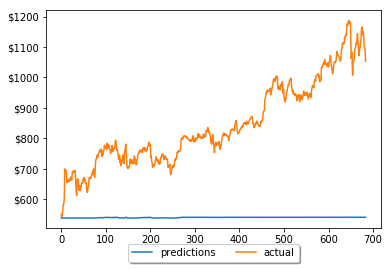

In [157]:
plt.plot(pred1, label="predictions")
 
 
y_test = scaler_y.inverse_transform (np. array (y_test). reshape ((len( y_test), 1)))
plt.plot( [row[0] for row in y_test], label="actual")
 
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=2)
 
import matplotlib.ticker as mtick
fmt = '$%.0f'
tick = mtick.FormatStrFormatter(fmt)
 
ax = plt.axes()
ax.yaxis.set_major_formatter(tick)
 
 
plt.show()